In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("WineQT.csv")

In [3]:
df1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

In [5]:
df1.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>,
        <Axes: xlabel='Id', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>

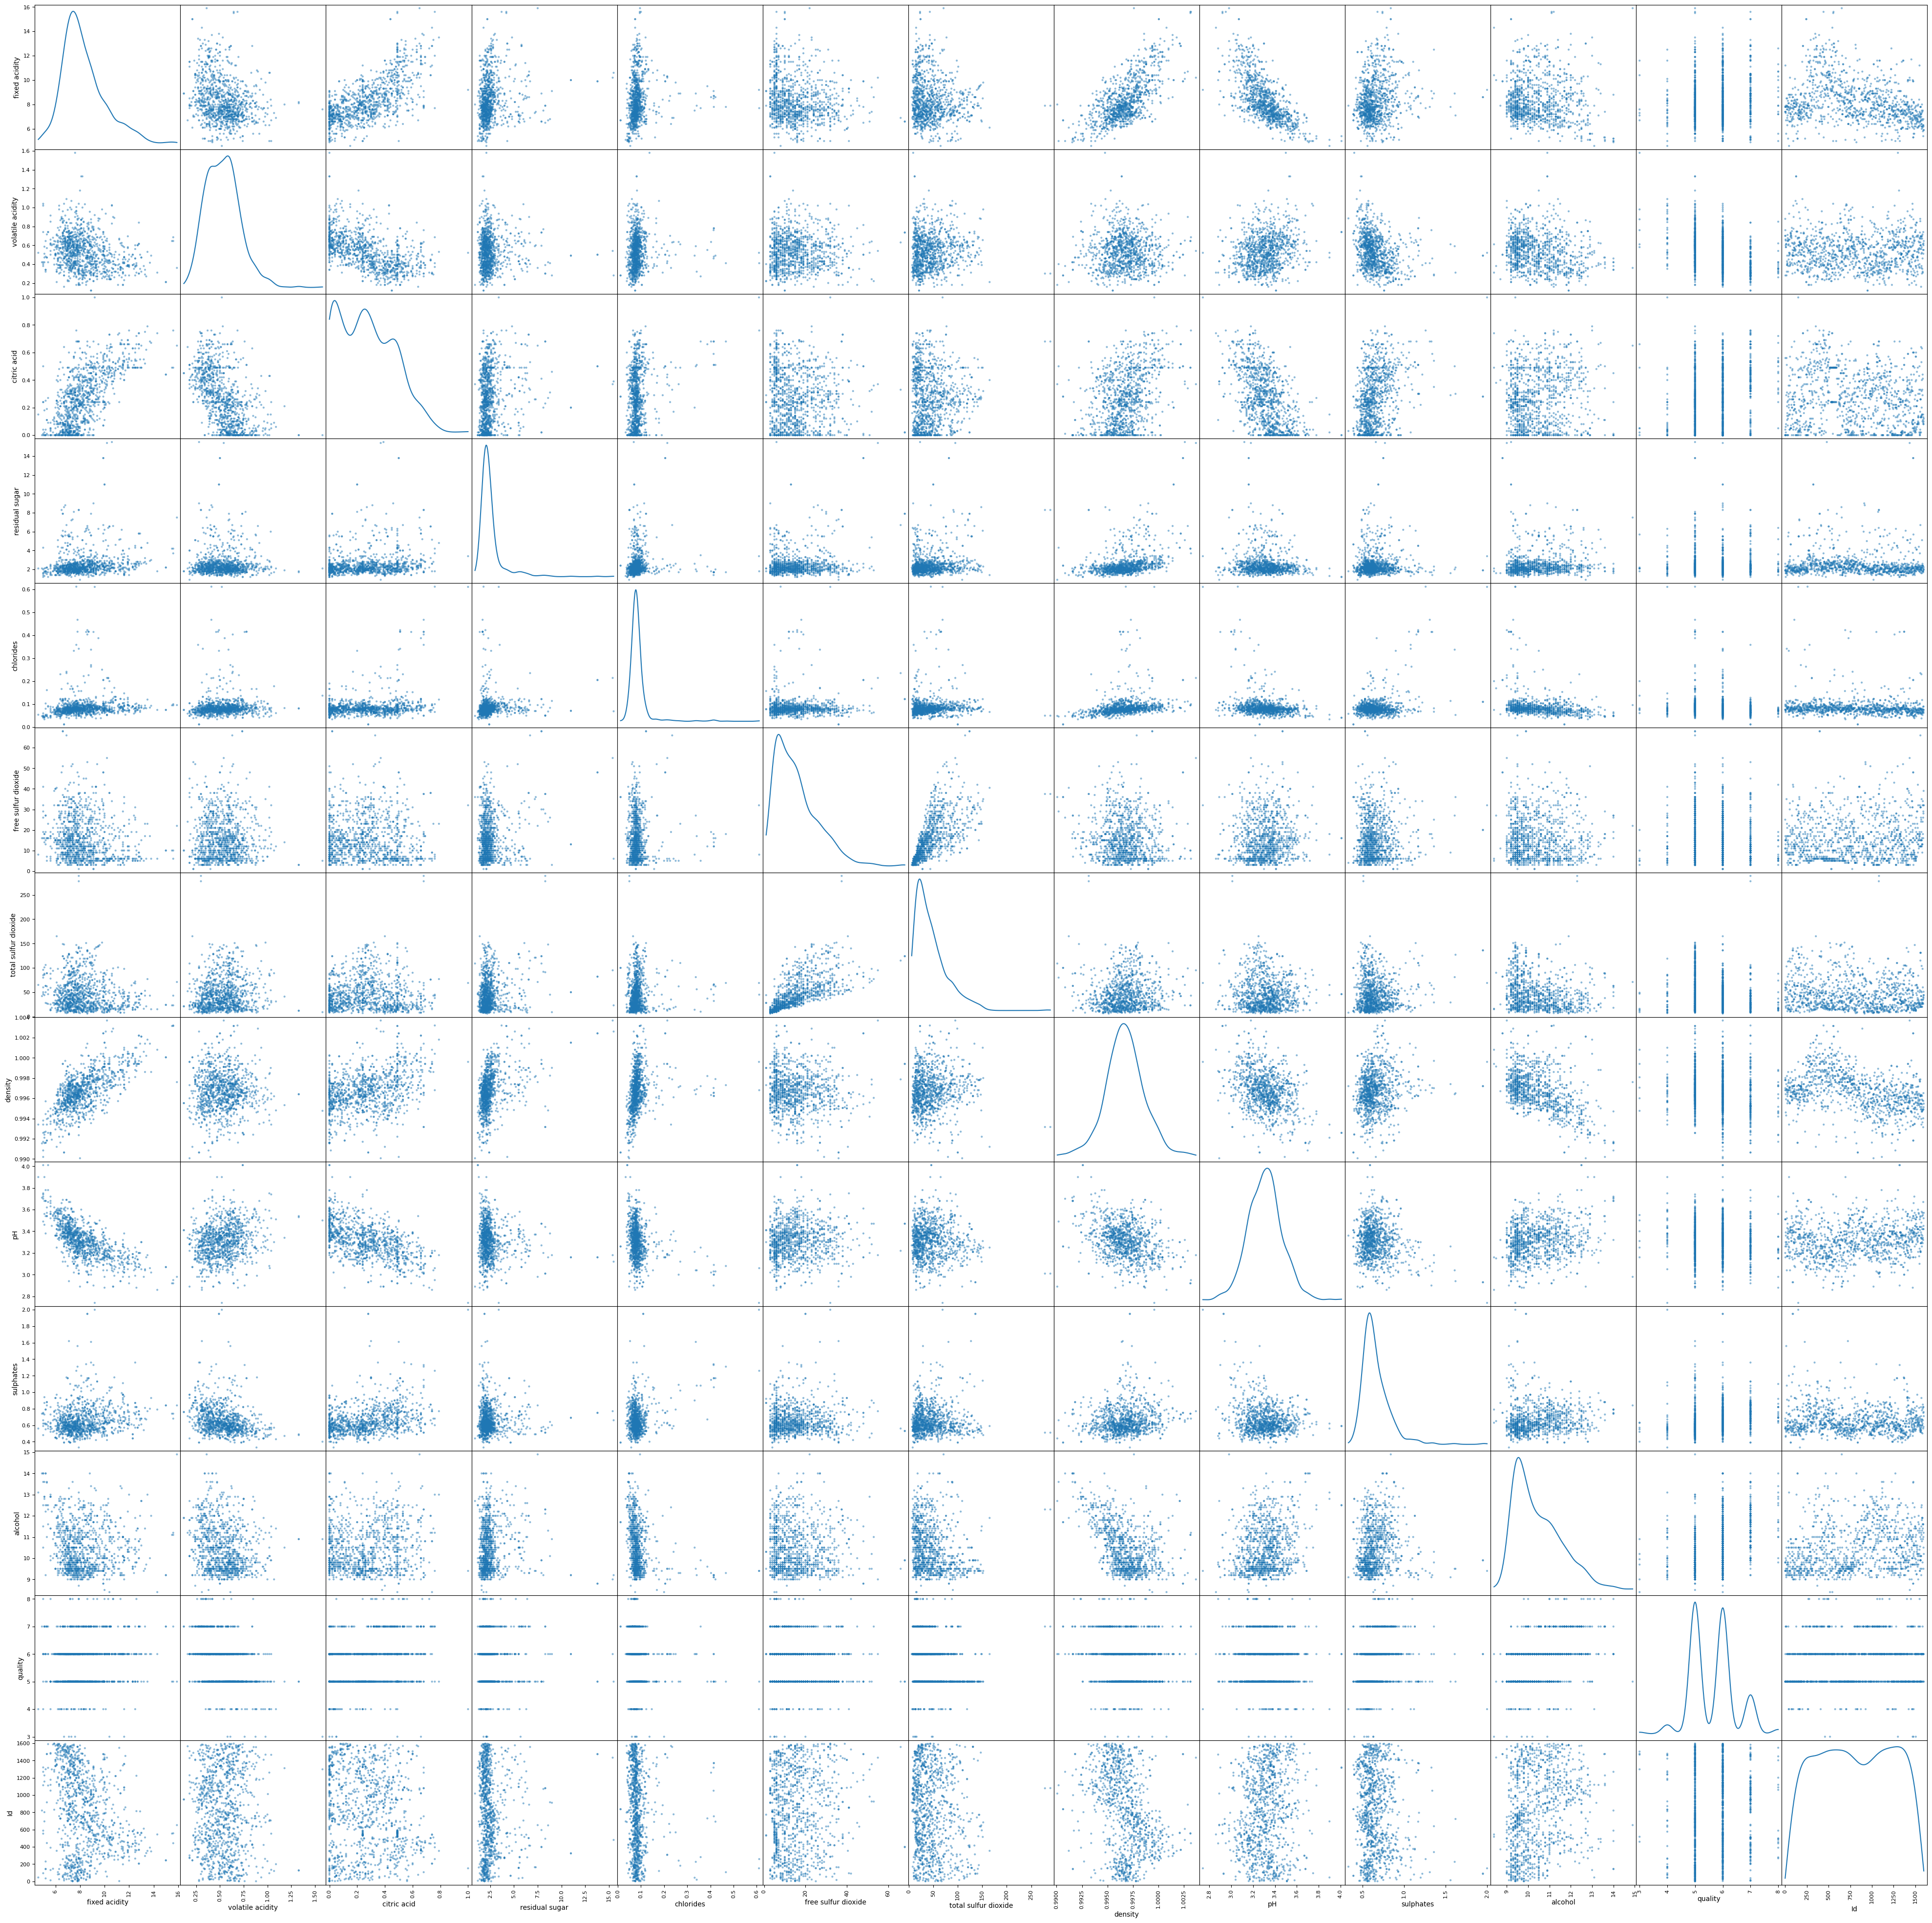

In [10]:
pd.plotting.scatter_matrix(df1,figsize=(50,50),diagonal = 'kde')

In [11]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [4]:
x = df1.drop(columns = ['quality', 'Id'])

In [5]:
y = df1['quality']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 300)

In [26]:
clf = DecisionTreeClassifier(random_state=300)

In [27]:
dtree = clf.fit(x_train,y_train)

In [29]:
y_predict = dtree.predict(x_test)

In [30]:
confusion_matrix(y_test,y_predict)

array([[ 0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  2,  0,  0],
       [ 1,  3, 69, 30,  1,  1],
       [ 0,  2, 29, 50, 10,  1],
       [ 0,  0,  2, 11, 10,  0],
       [ 0,  0,  0,  2,  2,  0]], dtype=int64)

In [31]:
dtree.score(x_test,y_test)

0.5676855895196506

In [34]:
dot_file_dtree = open('dtree_wineQT','w') 

In [35]:
tree.export_graphviz(dtree,out_file = dot_file_dtree,feature_names=x.columns)

[Text(0.4941526073619632, 0.9736842105263158, 'x[10] <= 10.525\ngini = 0.647\nsamples = 914\nvalue = [6.0, 28.0, 378.0, 370.0, 120.0, 12.0]'),
 Text(0.2955010224948875, 0.9210526315789473, 'x[9] <= 0.625\ngini = 0.553\nsamples = 551\nvalue = [5, 19, 315, 189, 22, 1]'),
 Text(0.21219964212678938, 0.868421052631579, 'x[6] <= 98.5\ngini = 0.468\nsamples = 333\nvalue = [3.0, 14.0, 227.0, 85.0, 4.0, 0.0]'),
 Text(0.1401457055214724, 0.8157894736842105, 'x[9] <= 0.545\ngini = 0.507\nsamples = 287\nvalue = [3.0, 14.0, 183.0, 83.0, 4.0, 0.0]'),
 Text(0.06671779141104295, 0.7631578947368421, 'x[2] <= 0.305\ngini = 0.421\nsamples = 133\nvalue = [1, 10, 98, 23, 1, 0]'),
 Text(0.04550102249488753, 0.7105263157894737, 'x[3] <= 4.75\ngini = 0.384\nsamples = 113\nvalue = [1, 10, 87, 14, 1, 0]'),
 Text(0.037321063394683024, 0.6578947368421053, 'x[3] <= 1.25\ngini = 0.364\nsamples = 111\nvalue = [0, 10, 87, 13, 1, 0]'),
 Text(0.033231083844580775, 0.6052631578947368, 'gini = 0.0\nsamples = 1\nvalue = [

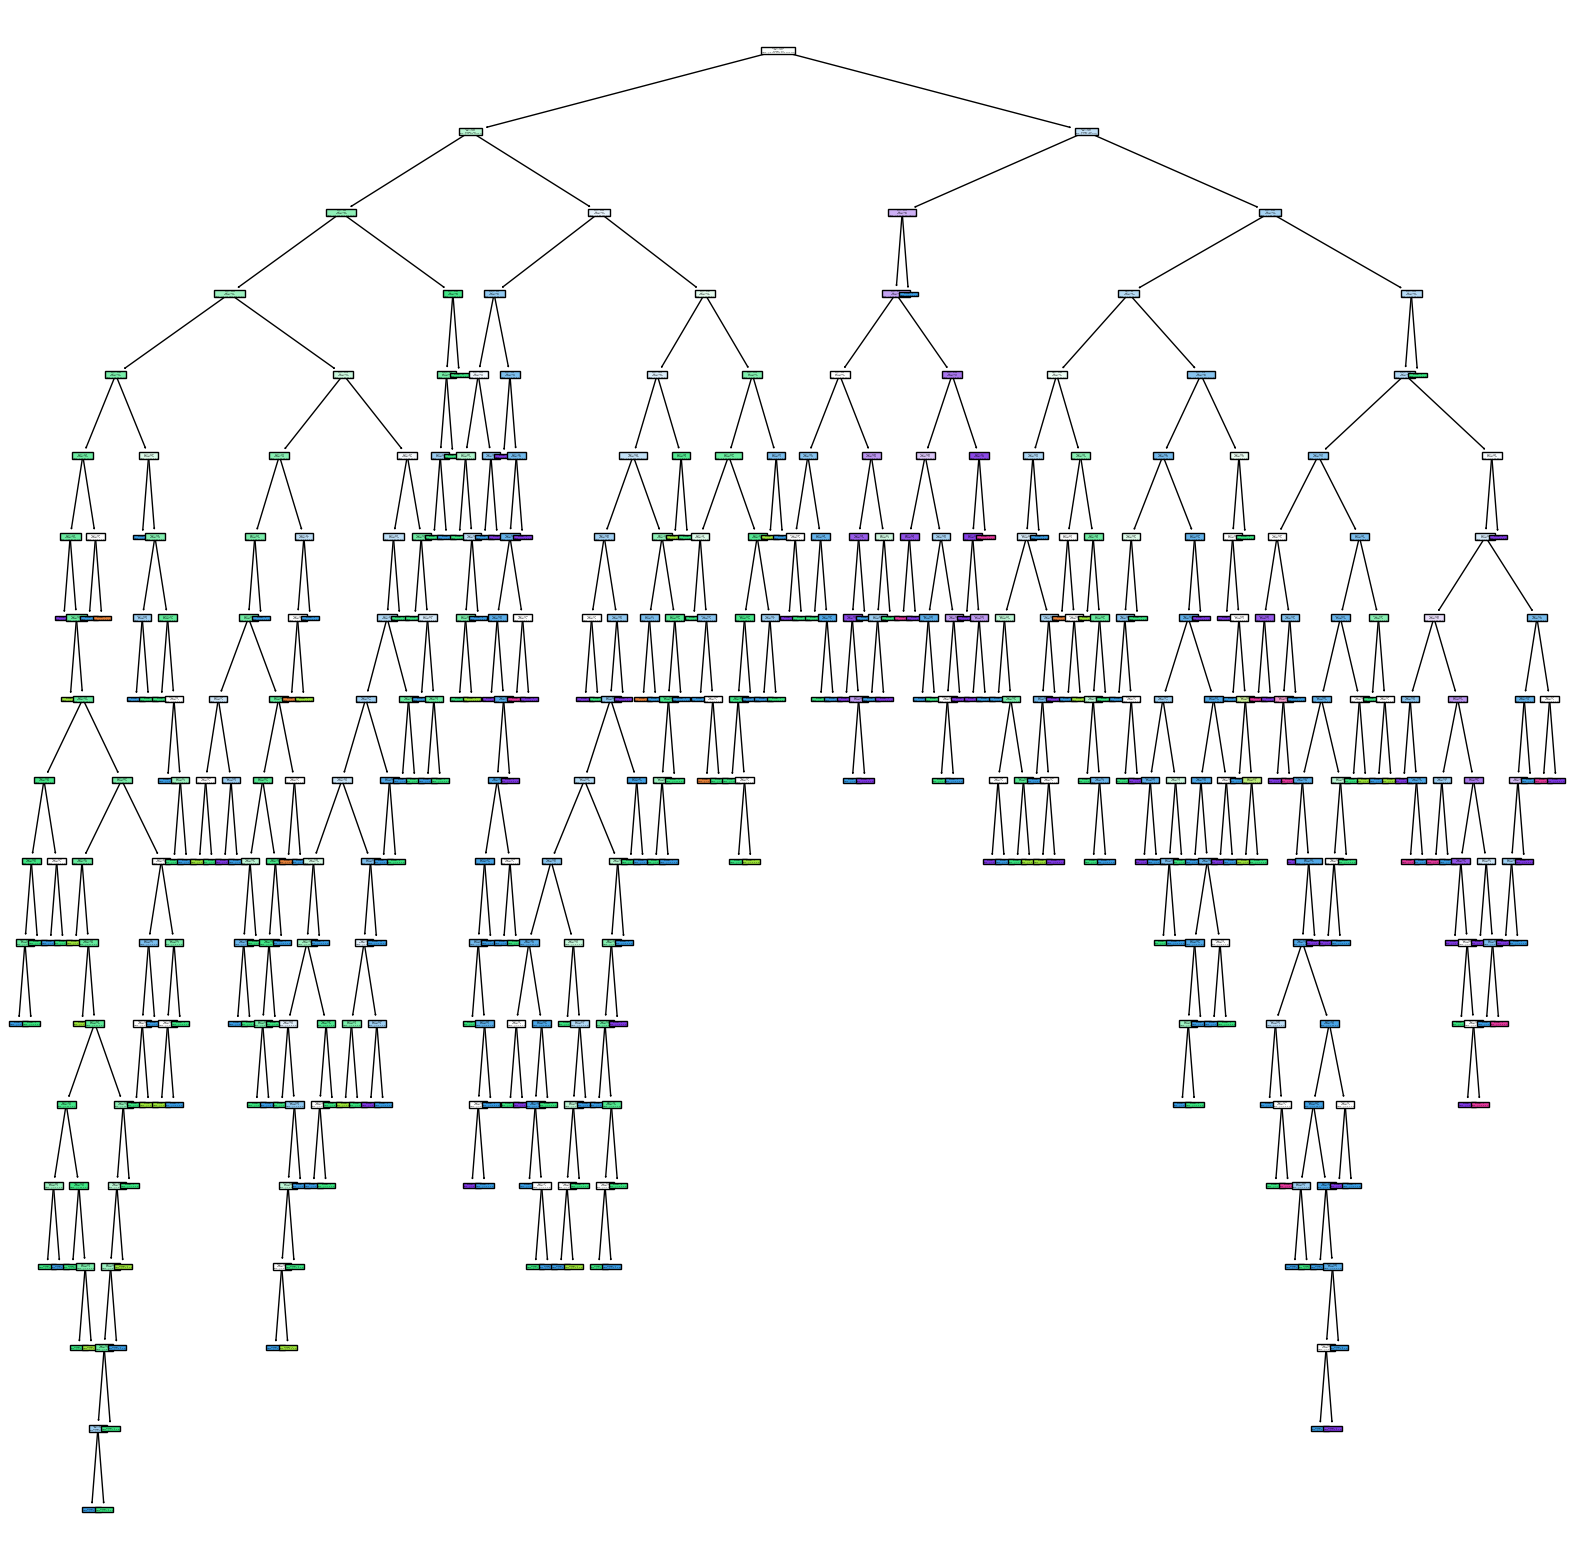

In [38]:
plt.figure(figsize=(20,20))
tree.plot_tree(dtree,filled=True)

In [64]:
df2 = df1.head(500)

In [65]:
x1 = df2.drop(columns = ['quality','Id'])

In [66]:
y1 = df2['quality']

In [67]:
dt_model1 = DecisionTreeClassifier(random_state = 300)
dtree1 = dt_model1.fit(x1,y1)

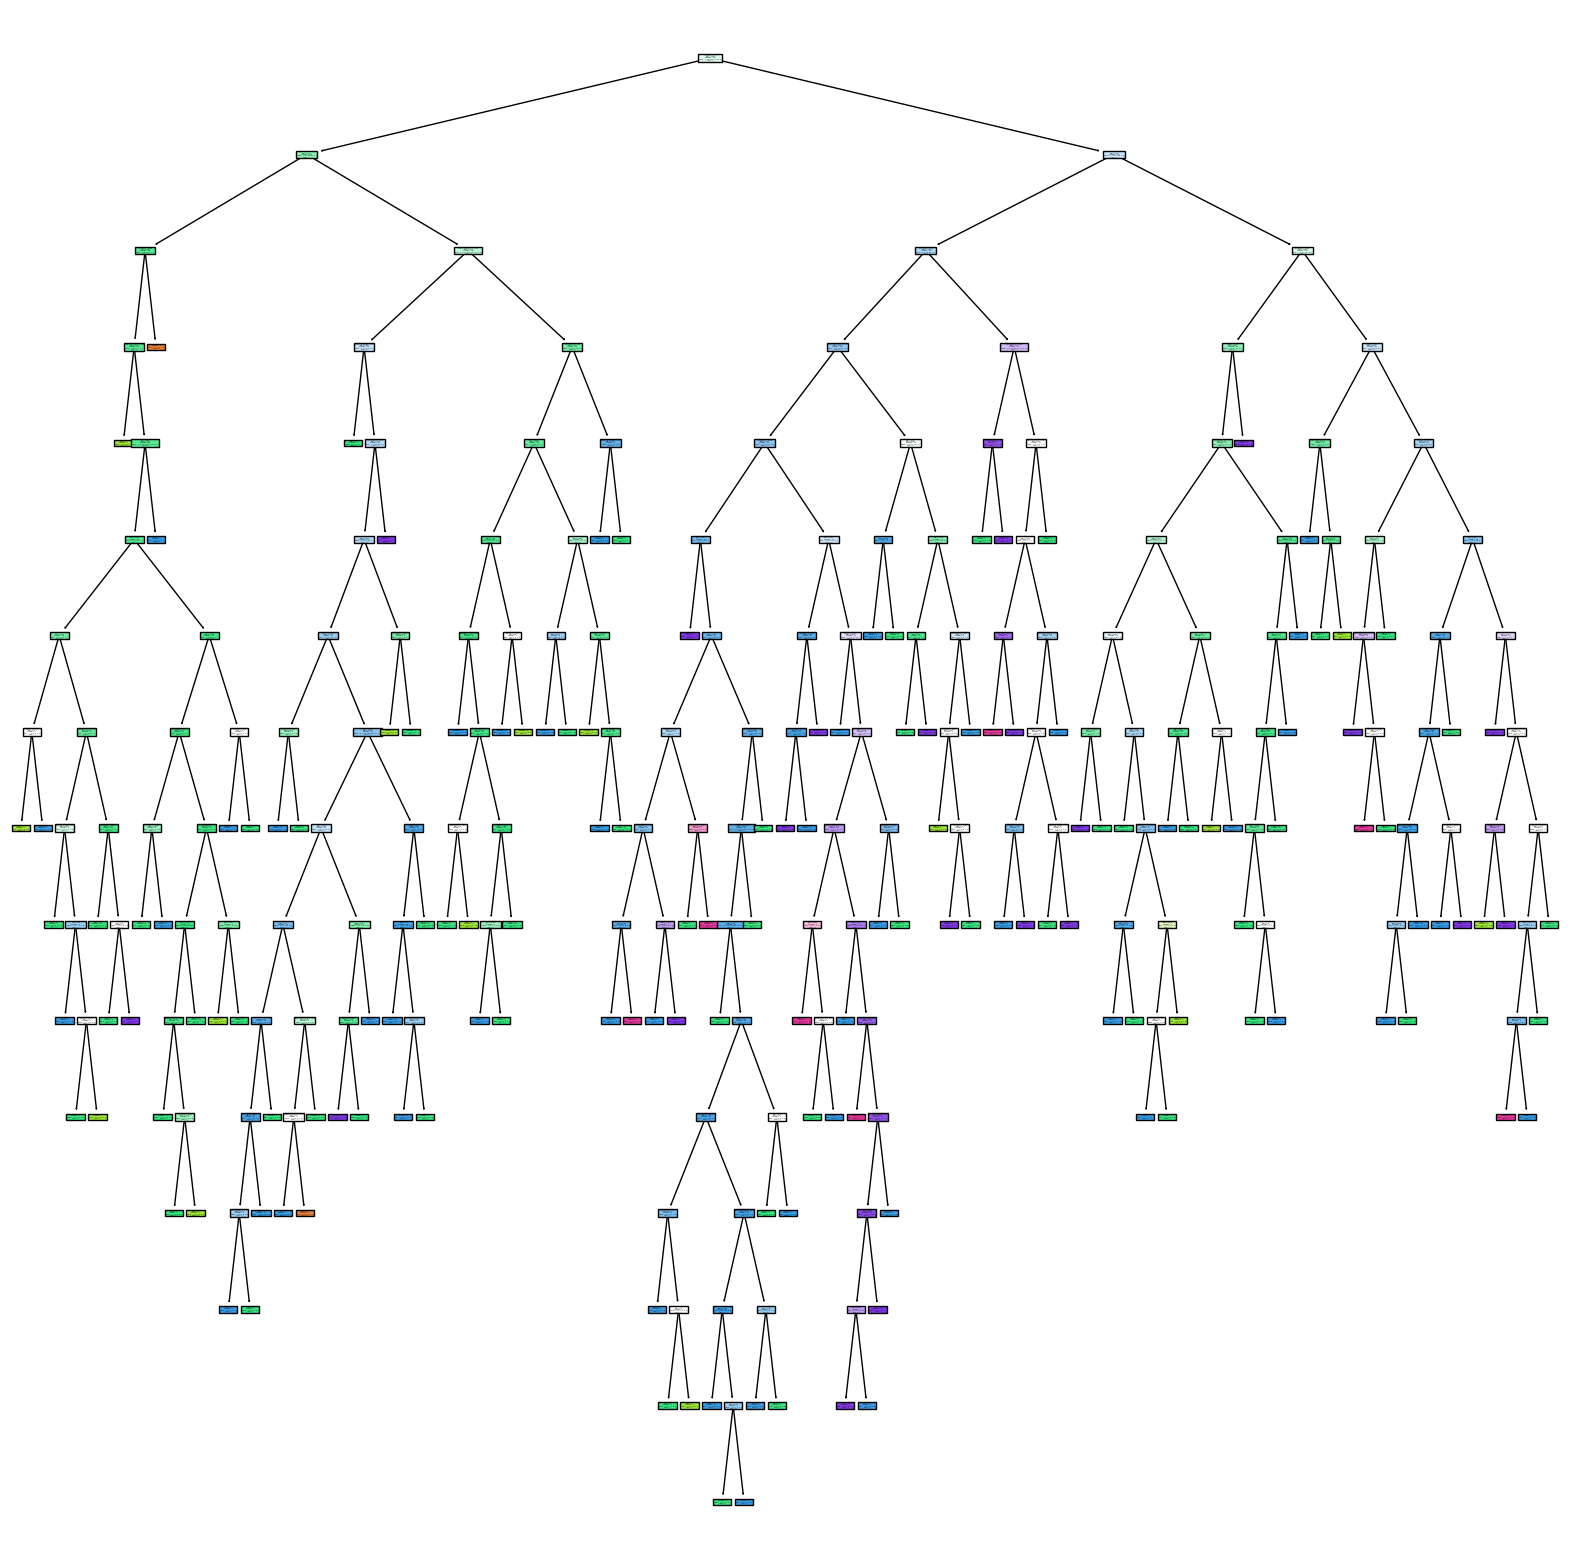

In [68]:
plt.figure(figsize=(20,20))
tree.plot_tree(dtree1,filled=True, class_names=[str(i) for i in set(y1)], feature_names = x1.columns)
plt.savefig('dt_model_wineQT')

In [69]:
df2.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     500.000000        500.000000   500.000000       500.00000   
mean        8.960600          0.531750     0.315660         2.64620   
std         1.996567          0.178216     0.210667         1.40129   
min         4.600000          0.180000     0.000000         1.20000   
25%         7.600000          0.400000     0.140000         1.90000   
50%         8.600000          0.520000     0.295000         2.30000   
75%        10.225000          0.636250     0.490000         2.70000   
max        15.900000          1.330000     1.000000        15.50000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  500.000000           500.000000            500.000000  500.000000   
mean     0.090726            14.689000             49.314000    0.997643   
std      0.052516             9.765681             33.719451    0.001817   
min      0.034000             1.000000              8.000000    0.991200   
25%      0.073000             6.000000             23.000000    0.996500   
50%      0.082000            12.000000             41.000000    0.997500   
75%      0.092000            20.000000             64.250000    0.998800   
max      0.611000            68.000000            165.000000    1.003200   

               pH   sulphates    alcohol     quality          Id  
count  500.000000  500.000000  500.00000  500.000000  500.000000  
mean     3.279240    0.681700   10.16060    5.594000  352.598000  
std      0.162532    0.196913    1.03988    0.804025  203.314963  
min      2.740000    0.330000    8.40000    3.000000    0.000000  
25%      3.170000    0.560000    9.40000    5.000000  176.750000  
50%      3.280000    0.630000    9.80000    5.000000  354.500000  
75%      3.380000    0.742500   10.60000    6.000000  530.250000  
max      3.900000    2.000000   14.90000    8.000000  702.000000

In [70]:
dt_model1.score(x_test, y_test)

0.6768558951965066

In [71]:
path = dt_model1.cost_complexity_pruning_path(x1,y1)

In [72]:
ccp_alpha = path['ccp_alphas']

Text(0, 0.5, 'score')

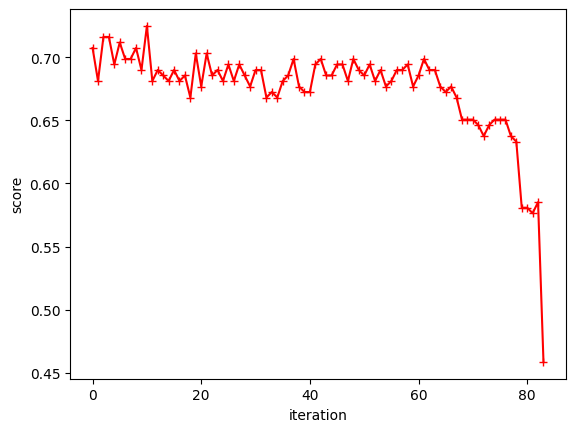

In [73]:
dt_model2 = []
score = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha = ccp)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)
    score.append(dt_m.score(x_test,y_test))


plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [74]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0012666666666666664),
 DecisionTreeClassifier(ccp_alpha=0.0013066666666666671),
 DecisionTreeClassifier(ccp_alpha=0.0018571428571428576),
 DecisionTreeClassifier(ccp_alpha=0.001866666666666667),
 DecisionTreeClassifier(ccp_alpha=0.001875),
 DecisionTreeClassifier(ccp_alpha=0.001875),
 DecisionTreeClassifier(ccp_alpha=0.0018777401129943503),
 DecisionTreeClassifier(ccp_alpha=0.0018918918918918916),
 DecisionTreeClassifier(ccp_alpha=0.0018947368421052642),
 DecisionTreeClassifier(ccp_alpha=0.001933333333333334),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 

In [75]:
train_score = [i.score(x1,y1) for i in dt_model2]

In [76]:
test_score = [i.score(x_test,y_test) for i in dt_model2]

Text(0, 0.5, 'decision tree score')

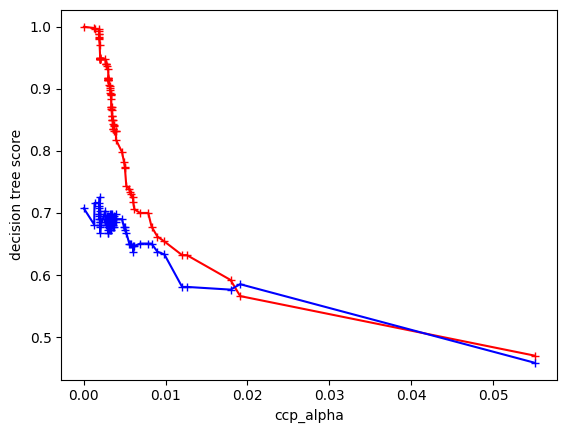

In [77]:
plt.plot(ccp_alpha, train_score, 'r-+', label = 'train')
plt.plot(ccp_alpha, test_score, 'b-+', label = 'validation')
plt.xlabel('ccp_alpha')
plt.ylabel('decision tree score')

In [78]:
dt_model_ccp  = DecisionTreeClassifier(ccp_alpha = 0.019)
dt_model_ccp.fit(x1, y1)

DecisionTreeClassifier(ccp_alpha=0.019)

[Text(0.4, 0.8333333333333334, 'alcohol <= 9.75\ngini = 0.629\nsamples = 500\nvalue = [2, 16, 235, 186, 52, 9]\nclass = 5'),
 Text(0.2, 0.5, 'gini = 0.471\nsamples = 228\nvalue = [2, 9, 155, 58, 4, 0]\nclass = 5'),
 Text(0.6, 0.5, 'volatile acidity <= 0.555\ngini = 0.659\nsamples = 272\nvalue = [0, 7, 80, 128, 48, 9]\nclass = 6'),
 Text(0.4, 0.16666666666666666, 'gini = 0.619\nsamples = 163\nvalue = [0, 2, 28, 89, 37, 7]\nclass = 6'),
 Text(0.8, 0.16666666666666666, 'gini = 0.632\nsamples = 109\nvalue = [0, 5, 52, 39, 11, 2]\nclass = 5')]

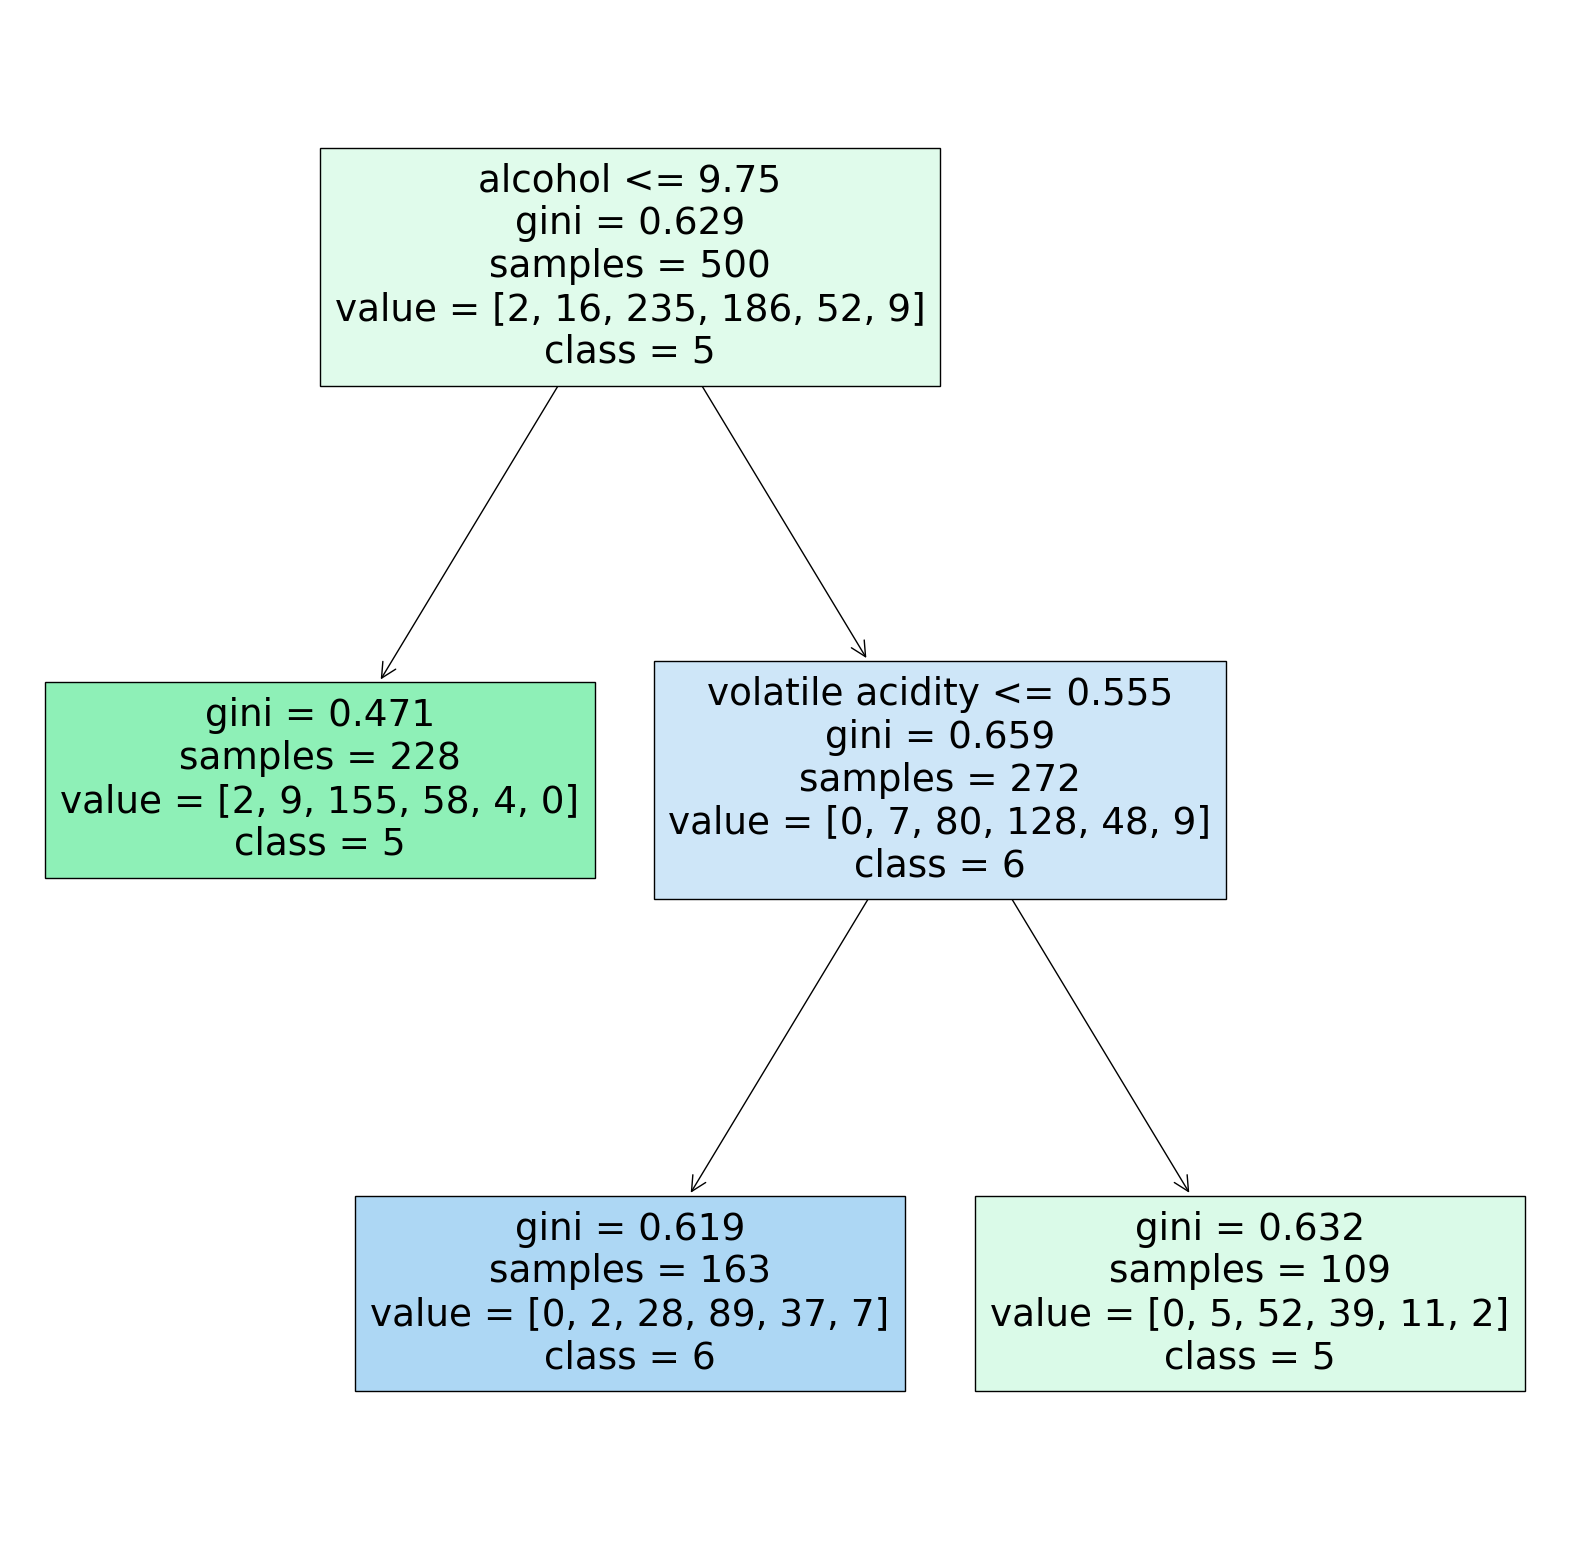

In [79]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp, filled =True, class_names=[str(i) for i in set(y1)], feature_names=x1.columns)

In [80]:
dt_model_ccp.score(x1,y1)

0.592

In [81]:
dt_model_ccp.score(x_test,y_test)

0.5764192139737991

In [82]:
grid_param = {
    "criterion": ['gini','entropy'],
    "splitter": ['best','random'],
    "max_depth": range(2,40,1),
    "min_samples_split": range(2,10,1),
    "min_samples_leaf": range(1,10,1)
}

In [83]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp, param_grid=grid_param, cv=5, n_jobs = -1)

In [84]:
grid_ccp.fit(x1,y1)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(ccp_alpha=0.019), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [86]:
grid_ccp.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'splitter': 'random'}

In [87]:
dt_best_param = DecisionTreeClassifier(criterion = 'gini', max_depth = 18, min_samples_leaf = 6, min_samples_split = 4, splitter = 'random', ccp_alpha = 0.019)

In [89]:
dt_best_param.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.019, max_depth=18, min_samples_leaf=6,
                       min_samples_split=4, splitter='random')

In [90]:
dt_best_param.score(x1,y1)

0.568

In [93]:
dt_best_param.score(x_test,y_test)  #Hyper Paramter Tuning does not guarantee to reduce Over-fitting instead increase data. 

0.5283842794759825

In [94]:
y_predict = dt_best_param.predict(x_test)

In [95]:
confusion_matrix(y_test,y_predict)

array([[ 0,  5,  0,  0,  0],
       [ 0, 92, 13,  0,  0],
       [ 0, 63, 29,  0,  0],
       [ 0,  8, 15,  0,  0],
       [ 0,  1,  3,  0,  0]], dtype=int64)

In [96]:
set(y1)

{3, 4, 5, 6, 7, 8}

In [7]:
from sklearn.ensemble import BaggingClassifier